In [21]:
import pandas as pd
df=pd.read_csv('Churn_Modelling.csv')# loading the dataset into df
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df.isnull().sum()# checking for null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
df.info()# information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [24]:
df.duplicated().sum()# is there any duplicate element

np.int64(0)

In [25]:
df['Exited'].value_counts() # imbalance dataset

Exited
0    7963
1    2037
Name: count, dtype: int64

In [26]:
print(df['Gender'].value_counts()) 
print(df['Geography'].value_counts()) 

Gender
Male      5457
Female    4543
Name: count, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [38]:
cols=['RowNumber','CustomerId','CreditScore']
df.drop(columns=cols,inplace=True)

In [39]:
df.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
df2 = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df2 = df2.astype(int)
df2.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,42,2,0,1,1,1,101348,1,0,0,0
1,41,1,83807,1,0,1,112542,0,0,1,0
2,42,8,159660,3,1,0,113931,1,0,0,0
3,39,1,0,2,0,0,93826,0,0,0,0
4,43,2,125510,1,1,1,79084,0,0,1,0


In [41]:
x=df2.drop(columns=['Exited'])
y=df['Exited']

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.transform(xtest)

In [44]:
pd.DataFrame(xtrain_scaled).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.944500,-0.701742,0.588164,0.802257,-1.553374,0.977259,0.427402,1.714901,-0.572731,0.915091
1,-0.944500,-0.355203,0.469851,0.802257,-1.553374,-1.023271,-1.025493,-0.583124,-0.572731,-1.092788
2,0.774987,0.337876,0.858782,-0.911510,0.643760,0.977259,-0.944793,1.714901,-0.572731,-1.092788
3,1.252622,0.337876,0.565605,0.802257,-1.553374,0.977259,-0.551941,1.714901,-0.572731,-1.092788
4,-0.562392,1.030954,0.730400,-0.911510,-1.553374,-1.023271,1.083388,-0.583124,1.746019,0.915091


In [45]:
!pip install tensorflow

In [46]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()# model formed
# hidden layers with 3 perceptrons
model.add(Dense(3,activation='sigmoid',input_dim=10)) # hidden layer with 10
# input layer with 10 input features
# adding output layers with 1 perceptron
model.add(Dense(1,activation='sigmoid'))# this actiavtion would give me a 
# probabilty
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 3)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
# model compilation
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(xtrain_scaled,ytrain,epochs=100,validation_split=0.2,verbose=1)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8617 - loss: 0.3471 - val_accuracy: 0.8494 - val_loss: 0.3513
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8617 - loss: 0.3468 - val_accuracy: 0.8494 - val_loss: 0.3517
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8612 - loss: 0.3469 - val_accuracy: 0.8487 - val_loss: 0.3516
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8612 - loss: 0.3469 - val_accuracy: 0.8487 - val_loss: 0.3514
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8617 - loss: 0.3468 - val_accuracy: 0.8487 - val_loss: 0.3514
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8614 - loss: 0.3468 - val_accuracy: 0.8500 - val_loss: 0.3514
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8616 - loss: 0.3468 - val_accuracy: 0.8481 - val_loss: 0.3515
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8622 - loss: 0.3468 - val_accu

WHEN DO THE NEURAL NETWORK OVEFITT?
-when the training accuarcy keeps on increasing while the validation accuracy 
 saturates out then that leads to overfitting

In [92]:
import matplotlib.pyplot as plt
history.history

{'accuracy': [0.8617187738418579,
  0.8617187738418579,
  0.8612499833106995,
  0.8612499833106995,
  0.8617187738418579,
  0.8614062666893005,
  0.8615624904632568,
  0.8621875047683716,
  0.8610937595367432,
  0.8615624904632568,
  0.8610937595367432,
  0.8618749976158142,
  0.8615624904632568,
  0.8612499833106995,
  0.8620312213897705,
  0.8618749976158142,
  0.8617187738418579,
  0.862500011920929,
  0.8618749976158142,
  0.8610937595367432,
  0.8604687452316284,
  0.8617187738418579,
  0.8609374761581421,
  0.8600000143051147,
  0.8617187738418579,
  0.8621875047683716,
  0.8607812523841858,
  0.8614062666893005,
  0.8618749976158142,
  0.8615624904632568,
  0.8610937595367432,
  0.8610937595367432,
  0.8618749976158142,
  0.8609374761581421,
  0.8614062666893005,
  0.8615624904632568,
  0.8609374761581421,
  0.8604687452316284,
  0.8617187738418579,
  0.8617187738418579,
  0.8620312213897705,
  0.8598437309265137,
  0.8600000143051147,
  0.8620312213897705,
  0.8629687428474426,

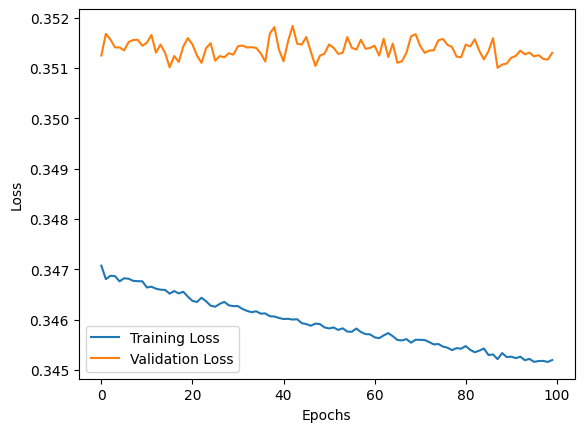

In [93]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


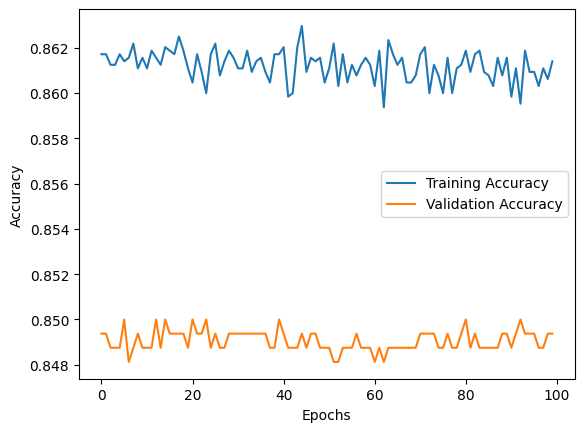

In [94]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [95]:
model.layers[1].get_weights()

[array([[ 4.468715],
        [-4.025668],
        [-4.884532]], dtype=float32),
 array([2.5995672], dtype=float32)]

In [96]:
ylog=model.predict(xtest_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [97]:
import numpy as np
ypred=np.where(ylog>0.5,1,0)

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.8635